In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
import chart_studio.plotly as py

In [2]:
#Loading datasets and displaying all the columns
pd.set_option('display.max_columns', None)
df = pd.read_csv('./input/2016 School Explorer.csv')
shsat = pd.read_csv('./input/D5 SHSAT Registrations and Testers.csv')
safety = pd.read_csv('./input/2010-2016-school-safety-report.csv')

In [3]:
#Removing % and dividing by 100 for percentages
def p2f(x):
    return float(x.strip('%'))/100

df['Percent of Students Chronically Absent']=df['Percent of Students Chronically Absent'].astype(str).apply(p2f)
df['Rigorous Instruction %'] = df['Rigorous Instruction %'].astype(str).apply(p2f)
df['Collaborative Teachers %'] = df['Collaborative Teachers %'].astype(str).apply(p2f)
df['Supportive Environment %'] = df['Supportive Environment %'].astype(str).apply(p2f)
df['Effective School Leadership %'] = df['Effective School Leadership %'].astype(str).apply(p2f)
df['Strong Family-Community Ties %'] = df['Strong Family-Community Ties %'].astype(str).apply(p2f)
df['Trust %'] = df['Trust %'].astype(str).apply(p2f)
df['Student Attendance Rate'] = df['Student Attendance Rate'].astype(str).apply(p2f)

In [4]:
#Function to convert percent fields to integers
def percent_to_int(df_in):
    for col in df_in.columns.values:
        if col.startswith("Percentage") or col.endswith("%") or col.startswith('Percent') or col.endswith("Rate"):
            df_in[col] = df_in[col].astype(np.object).str.replace('%', '').astype(float)
    return df_in

In [5]:
df['School Income Estimate'] = df['School Income Estimate'].str.replace(',', '')
df['School Income Estimate'] = df['School Income Estimate'].str.replace('$', '')
df['School Income Estimate'] = df['School Income Estimate'].str.replace(' ', '')
df['School Income Estimate'] = df['School Income Estimate'].astype(float)

c:\users\arindam\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [6]:
#Replacing missing values with 0 
df['School Income Estimate'] = df['School Income Estimate'].fillna(0)
df['Economic Need Index'] = df['Economic Need Index'].fillna(0)

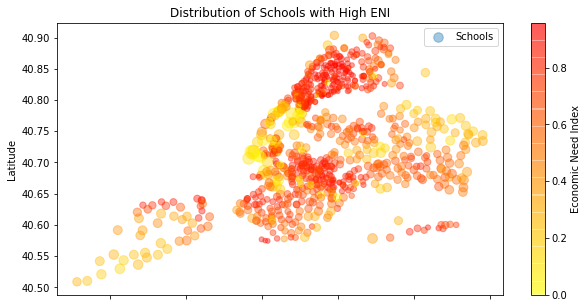

In [7]:
#Plotting a geolocation heatmap of economic need index score across NYC
df.plot(kind="scatter", x="Longitude", y="Latitude",
    s=df['School Income Estimate']/1000, c="Economic Need Index", cmap=plt.get_cmap("autumn_r"),
        label='Schools', title='Distribution of Schools with High ENI', colorbar=True, alpha=0.4, figsize=(10, 5))

plt.legend()
plt.show()

In [8]:
#Applying modifications to percentages
df['Percent Asian'] = df['Percent Asian'].apply(p2f)
df['Percent Black'] = df['Percent Black'].apply(p2f)
df['Percent Hispanic'] = df['Percent Hispanic'].apply(p2f)
df['Percent White'] = df['Percent White'].apply(p2f)
df['Percent Black / Hispanic'] = df['Percent Black / Hispanic'].apply(p2f)

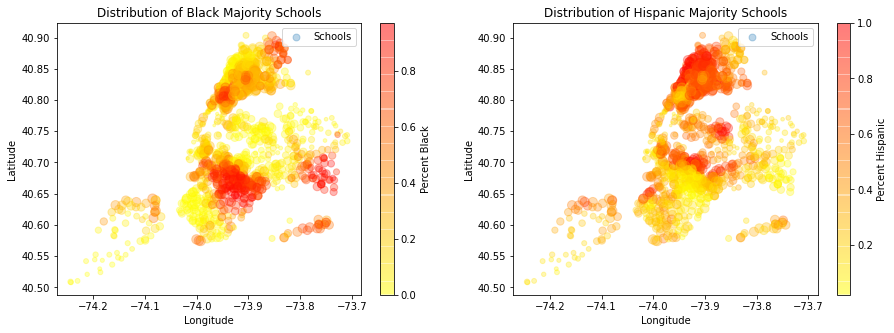

In [9]:
#Plotting a geolocation heatmap for black and hispanic majority schools across NYC
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

df.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[0],
    s=df['Economic Need Index']*100, c="Percent Black", cmap=plt.get_cmap("autumn_r"),label='Schools', title='Distribution of Black Majority Schools',
    colorbar=True, alpha=0.3, figsize=(15,5))

df.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[1],
    s=df['Economic Need Index']*100, c="Percent Hispanic", cmap=plt.get_cmap("autumn_r"),label='Schools', title='Distribution of Hispanic Majority Schools',
    colorbar=True, alpha=0.3, figsize=(15,5))

plt.legend()

plt.show()

Text(0, 0.5, 'School Count')

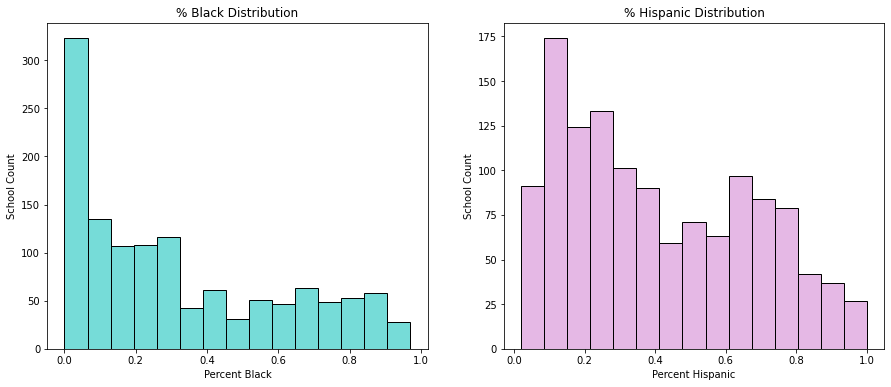

In [10]:
#Distribution of black and hispanic students across schools in NYC
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

# Graph Employee Average Monthly Hours
sns.histplot(df['Percent Black'], kde=False, color="mediumturquoise", ax=axes[0], bins=15).set_title('% Black Distribution')
axes[0].set_ylabel('School Count')

# Graph Employee Average Monthly Hours
sns.histplot(df['Percent Hispanic'], kde=False, color="plum", ax=axes[1], bins=15).set_title('% Hispanic Distribution')
axes[1].set_ylabel('School Count')

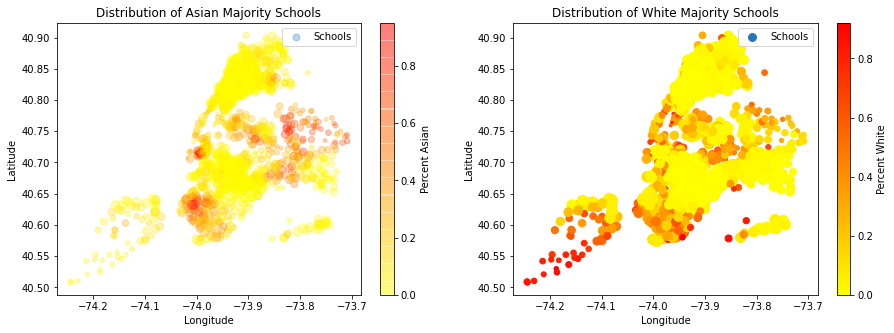

In [11]:
#Plotting a geolocation heatmap of asian and white majority schools across NYC
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

df.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[0],
    s=df['Economic Need Index']*100, c="Percent Asian", label='Schools', cmap=plt.get_cmap("autumn_r"), title='Distribution of Asian Majority Schools',
    colorbar=True, alpha=0.3, figsize=(15,5))

df.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[1],
    s=df['Economic Need Index']*130, c="Percent White", label='Schools', cmap=plt.get_cmap("autumn_r"), title='Distribution of White Majority Schools',
    colorbar=True, alpha=1, figsize=(15,5))

plt.legend()
plt.show()

Text(0, 0.5, 'School Count')

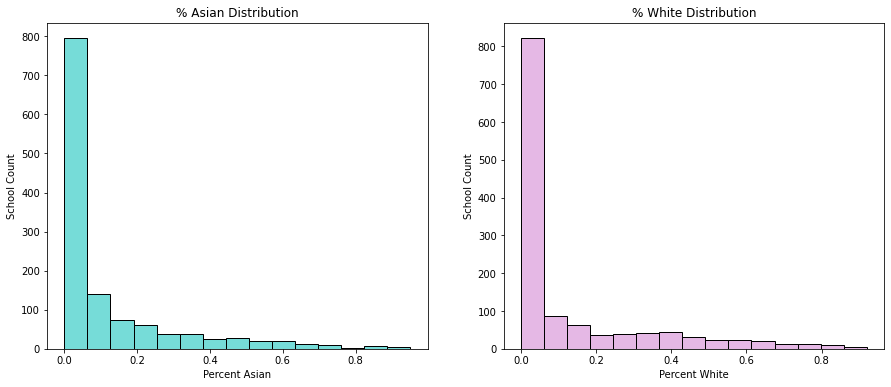

In [12]:
#Distribution of asian and white students across schools in NYC
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

# Graph Employee Satisfaction
sns.histplot(df['Percent Asian'], kde=False, color="mediumturquoise", ax=axes[0], bins=15).set_title('% Asian Distribution')
axes[0].set_ylabel('School Count')

# Graph Employee Evaluation
sns.histplot(df['Percent White'], kde=False, color="plum", ax=axes[1], bins=15).set_title('% White Distribution')
axes[1].set_ylabel('School Count')

<AxesSubplot:>

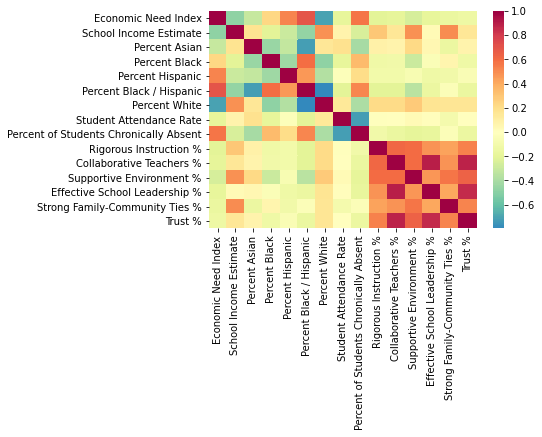

In [13]:
#Checking correlation between race and economic need index score
df2 = df.iloc[:,[16,17,19,20,21,22,23,24,25,26,28,30,32,34,36]]

#Generating the correlation matrix
corr = df2.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="Spectral_r", center=0)

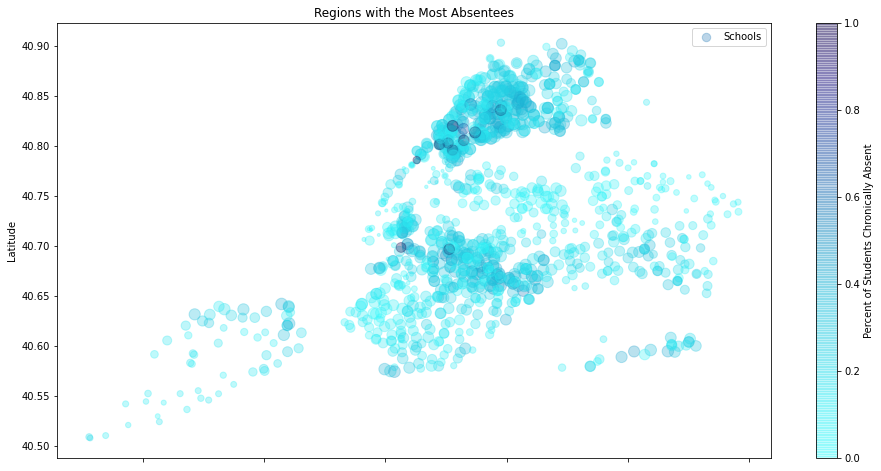

In [14]:
#Geolocation heatmap to visualize which regions have the most chronic absentees in NYC
#Tweaking the colormaps a bit, multiply them with the factor "a", and create new colormap
from matplotlib.colors import ListedColormap

a = 0.2
my_cmap = plt.cm.BuPu(np.arange(plt.cm.BuPu.N))
my_cmap[:, 0:1] *= a 
my_cmap = ListedColormap(my_cmap)

df.plot(kind="scatter", x="Longitude", y="Latitude",
    s=df['Economic Need Index']*150, c='Percent of Students Chronically Absent', cmap=my_cmap, label='Schools', title='Regions with the Most Absentees',
    colorbar=True, alpha=0.3, figsize=(16, 8))

plt.legend()
plt.show()

Text(0.5, 1.0, 'Economic Need Index (Hispanic)')

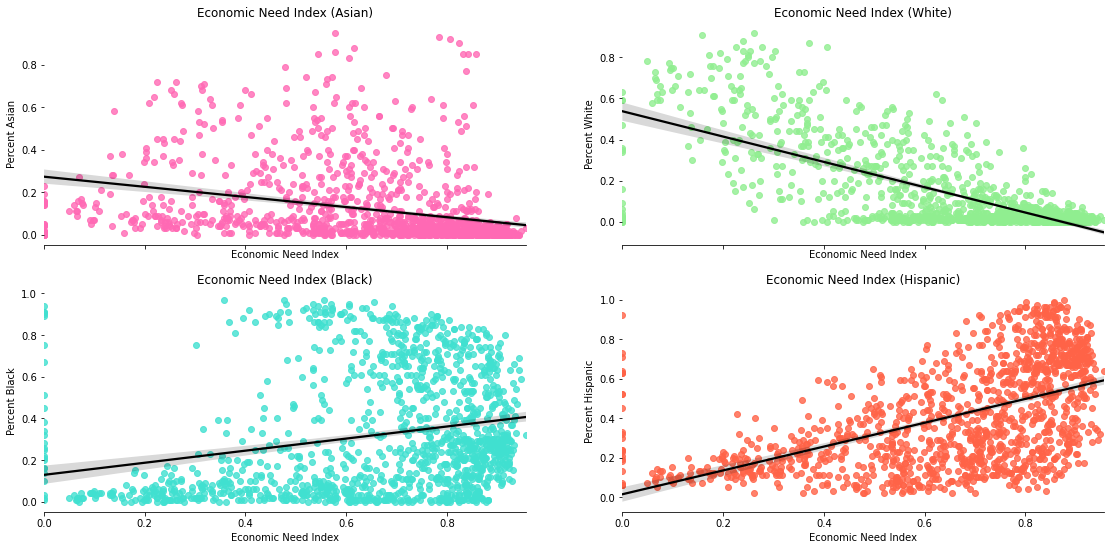

In [15]:
#Regression plot between race and economic need index
f, axes = plt.subplots(2, 2, figsize=(19, 9), sharex=True)
sns.despine(left=True)

sns.regplot(x=df["Economic Need Index"], y=df["Percent Asian"], color='hotpink', ax=axes[0, 0], line_kws={"color": "black"})
sns.regplot(x=df["Economic Need Index"], y=df["Percent White"], color='lightgreen', ax=axes[0, 1], line_kws={"color": "black"})
sns.regplot(x=df["Economic Need Index"], y=df["Percent Black"], color='turquoise', ax=axes[1, 0], line_kws={"color": "black"})
sns.regplot(x=df["Economic Need Index"], y=df["Percent Hispanic"], color='tomato', ax=axes[1, 1], line_kws={"color": "black"})

axes[0,0].set_title('Economic Need Index (Asian)')
axes[0,1].set_title('Economic Need Index (White)')
axes[1,0].set_title('Economic Need Index (Black)')
axes[1,1].set_title('Economic Need Index (Hispanic)')

Text(0, 0.5, 'Frequency Count')

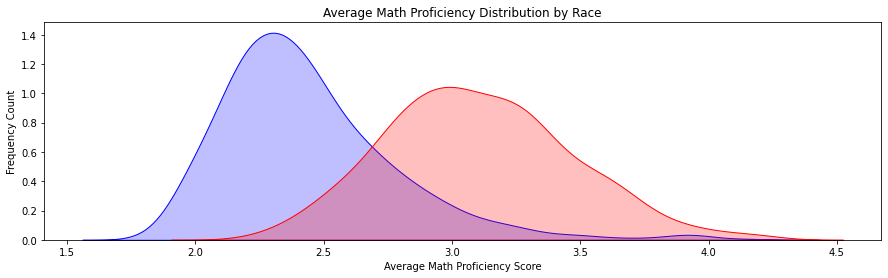

In [16]:
#Setting the criteria for a school to be Black/Hispanic dominant
df['Black_Hispanic_Dominant'] = df['Percent Black / Hispanic'] >= .70

#KDEPlot: Kernel Density Estimate Plot for performance in Maths
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Black_Hispanic_Dominant'] == True),'Average Math Proficiency'] , color='b',shade=True, label='Black/Hispanic Dominant School')
ax=sns.kdeplot(df.loc[(df['Black_Hispanic_Dominant'] == False),'Average Math Proficiency'] , color='r',shade=True, label='Asian/White Dominant School')

plt.title('Average Math Proficiency Distribution by Race')
plt.xlabel('Average Math Proficiency Score')
plt.ylabel('Frequency Count')

Text(0, 0.5, 'Frequency Count')

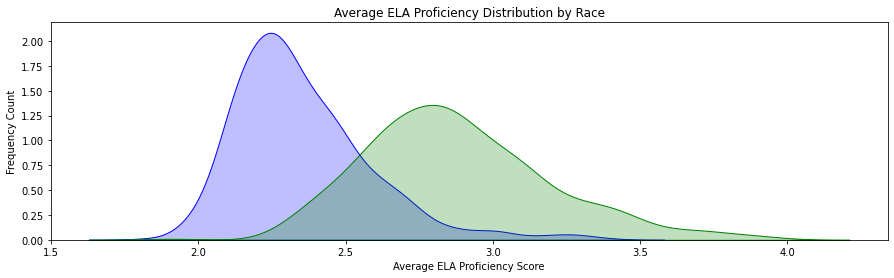

In [17]:
#KDEPlot: Kernel Density Estimate Plot for ELA performance 
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Black_Hispanic_Dominant'] == True),'Average ELA Proficiency'] , color='b',shade=True, label='Black/Hispanic Dominant School')
ax=sns.kdeplot(df.loc[(df['Black_Hispanic_Dominant'] == False),'Average ELA Proficiency'] , color='g',shade=True, label='Asian/White Dominant School')

plt.title('Average ELA Proficiency Distribution by Race')
plt.xlabel('Average ELA Proficiency Score')
plt.ylabel('Frequency Count')

In [19]:
#Data on SHSAT offers
df_shsat_offers = pd.read_csv('./input/2017-2018 SHSAT Admissions Test Offers By Sending School.csv')

#Convert percentages to int, NaN's to 0
df_shsat_offers = percent_to_int(df_shsat_offers)
df_shsat_offers.replace(np.NaN, 0, inplace=True)

c:\users\arindam\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Text(0, 0.5, 'Number of Students who took SHSAT')

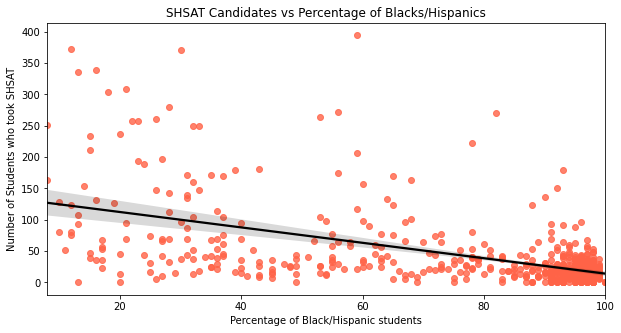

In [25]:
#Percentage of Blacks/Hispanics vs SHSAT candidates
f, axes = plt.subplots(1, 1, figsize=(10, 5), sharex=True)

sns.regplot(x=df_shsat_offers["Percentage of Black/Hispanic students"], y=df_shsat_offers["Number of students who took test"], color='tomato', line_kws={"color": "black"})

axes.set_title('SHSAT Candidates vs Percentage of Blacks/Hispanics')
axes.set_ylabel('Number of Students who took SHSAT')